# *Final Project for Introduction to Environmental Modelling*

## The Wetland Model

### This code simulates the growth of biomass in a wetland depending on the water provided by a river. At different levels of water abstraction, the model shows a significant reduction in biomass.

In [38]:
import pandas as pd
import numpy as np
import random
import math
import scipy
import powerlaw
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
from collections import OrderedDict
from sklearn.metrics import mean_squared_error
from math import sqrt
from  matplotlib import style
#style.use("ggplot")

### Data Import Procedure

In [39]:
Weather_df = pd.read_excel('C:\\Users\\pblac\\OneDrive\\Documentos\\MSc ESS\\SEMESTER 2\\IEM\\PROJECT3\\Input_Data.xlsx', sheet_name='weather')
Inflow_df = pd.read_excel('C:\\Users\\pblac\\OneDrive\\Documentos\\MSc ESS\\SEMESTER 2\\IEM\\PROJECT3\\Input_Data.xlsx', sheet_name='Inflow')

In [40]:
Big_t = pd.merge(Weather_df, Inflow_df, 'left')
Big_t.head()

t  Temp         S      InF
0  1  2.50  0.701721   8856.2
1  2  2.50  0.709406   8053.6
2  3  3.00  0.717812   9040.8
3  4  4.75  0.726942   9133.4
4  5  4.65  1.527594  10149.0

In [41]:
Outflow_df = pd.read_excel('C:\\Users\\pblac\\OneDrive\\Documentos\\MSc ESS\\SEMESTER 2\\IEM\\PROJECT3\\Data_WaterContent_Evap_Outflow.xlsx', sheet_name='OutFlow')
Evapor_df = pd.read_excel('C:\\Users\\pblac\\OneDrive\\Documentos\\MSc ESS\\SEMESTER 2\\IEM\\PROJECT3\\Data_WaterContent_Evap_Outflow.xlsx', sheet_name='Evap')

In [42]:
Outflow_df.head()

Water Content (theta)  Outflow (m3)
0                 0.5670        113.79
1                 0.5400        300.70
2                 0.5800        311.85
3                 0.6405        272.48
4                 0.5130        350.55

In [43]:
Evapor_df.head()

Water Content (theta)  Evaporation (mm)
0                 0.5130             0.400
1                 0.5100             0.440
2                 0.5000             0.440
3                 0.5795             0.369
4                 0.5670             0.462

#### Simulation of water flow from the river to the wetland considering abstraction

In [46]:
def water_content(x1, y1, x2, y2, Inflow, Abstraction, wc0, N):
    x1 = np.array(x1).reshape(-1, 1)
    y1 = np.array(y1).reshape(-1, 1)
    x2 = np.array(x2).reshape(-1, 1)
    y2 = np.array(y2).reshape(-1, 1)
    regressor1 = LinearRegression()
    regressor1.fit(x1, y1)
    inter_of = regressor1.intercept_[0]
    slope_of = regressor1.coef_[0][0]
    regressor2 = LinearRegression()
    regressor2.fit(x2, y2)
    inter_ev = regressor2.intercept_[0]
    slope_ev = regressor2.coef_[0][0]
    m1 = float(slope_of)
    c1 = float(inter_of)
    m2 = float(slope_ev)
    c2 = float(inter_ev)
    y = np.zeros(N+1)
    y[0] = wc0
    for n in range(N):
        y[n+1] = y[n] + (Inflow[n]*(1-Abstraction)-(m1*(y[n]/10000000)+c1)-10000*(m2*(y[n]/10000000)+c2))
    for i in range(N):
        if (y[i+1]/10000000)>1:
            y[i+1] = 10000000
    return y/10000000

In [47]:
water_content(Outflow_df['Water Content (theta)'], Outflow_df['Outflow (m3)'], Evapor_df['Water Content (theta)'], Evapor_df['Evaporation (mm)'], 
             Big_t['InF'].tolist(), 0.2, 10000000, len(Big_t))

array([1.        , 0.99962443, 0.99918519, ..., 0.86417499, 0.86406608,
       0.86389386])

In [48]:
print(water_content(Outflow_df['Water Content (theta)'], Outflow_df['Outflow (m3)'], Evapor_df['Water Content (theta)'], Evapor_df['Evaporation (mm)'], 
             Big_t['InF'].tolist(), 0.2, 10000000, len(Big_t)))

[1.         0.99962443 0.99918519 ... 0.86417499 0.86406608 0.86389386]


### Water content $\theta$ abstracted (10%, 20%, 30%, 40% of total water)

In [51]:
Big_t['Theta_0'] = water_content(Outflow_df['Water Content (theta)'], Outflow_df['Outflow (m3)'], Evapor_df['Water Content (theta)'], 
                               Evapor_df['Evaporation (mm)'], Big_t['InF'].tolist(), 0, 10000000, len(Big_t))[0:3287].tolist()
Big_t['Theta_10'] = water_content(Outflow_df['Water Content (theta)'], Outflow_df['Outflow (m3)'], Evapor_df['Water Content (theta)'], 
                               Evapor_df['Evaporation (mm)'], Big_t['InF'].tolist(), 0.1, 10000000, len(Big_t))[0:3287].tolist()
Big_t['Theta_20'] = water_content(Outflow_df['Water Content (theta)'], Outflow_df['Outflow (m3)'], Evapor_df['Water Content (theta)'], 
                               Evapor_df['Evaporation (mm)'], Big_t['InF'].tolist(), 0.2, 10000000, len(Big_t))[0:3287].tolist()
Big_t['Theta_30'] = water_content(Outflow_df['Water Content (theta)'], Outflow_df['Outflow (m3)'], Evapor_df['Water Content (theta)'], 
                               Evapor_df['Evaporation (mm)'], Big_t['InF'].tolist(), 0.3, 10000000, len(Big_t))[0:3287].tolist()
Big_t['Theta_40'] = water_content(Outflow_df['Water Content (theta)'], Outflow_df['Outflow (m3)'], Evapor_df['Water Content (theta)'], 
                               Evapor_df['Evaporation (mm)'], Big_t['InF'].tolist(), 0.4, 10000000, len(Big_t))[0:3287].tolist()

In [52]:
Big_t.head()

t  Temp         S      InF   Theta_0  Theta_10  Theta_20  Theta_30  \
0  1  2.50  0.701721   8856.2  1.000000  1.000000  1.000000  1.000000   
1  2  2.50  0.709406   8053.6  0.999802  0.999713  0.999624  0.999536   
2  3  3.00  0.717812   9040.8  0.999523  0.999354  0.999185  0.999016   
3  4  4.75  0.726942   9133.4  0.999344  0.999085  0.998826  0.998566   
4  5  4.65  1.527594  10149.0  0.999174  0.998824  0.998474  0.998124   

   Theta_40  
0  1.000000  
1  0.999447  
2  0.998847  
3  0.998307  
4  0.997774

#### Differential equation of biomass growth depending on the water extracted $\theta$

In [53]:
def Biomass_theta(S, T, Theta, B_0, N):
    k = 0.45
    SLA = 0.02
    e_r = 1.4
    B_t = np.zeros(N+1)
    B_t[0] = float(B_0)
    for n in range(N):
        B_t[n+1] = ((1-np.exp(-k*0.5*SLA*B_t[n]))*e_r*S[n]*Theta[n]-(Temperature[n]/300)*B_t[n]) + B_t[n]
    return B_t

In [54]:
Sunshine = Big_t['S'].tolist()
Temperature = Big_t['Temp'].tolist()

In [55]:
Biomass_theta(Sunshine, Temperature, Big_t['Theta_10'], 85, len(Big_t))

array([85.        , 84.60392186, 84.21326519, ..., 86.99817641,
       85.82080226, 84.81664142])

#### Simulated Biomass Graph

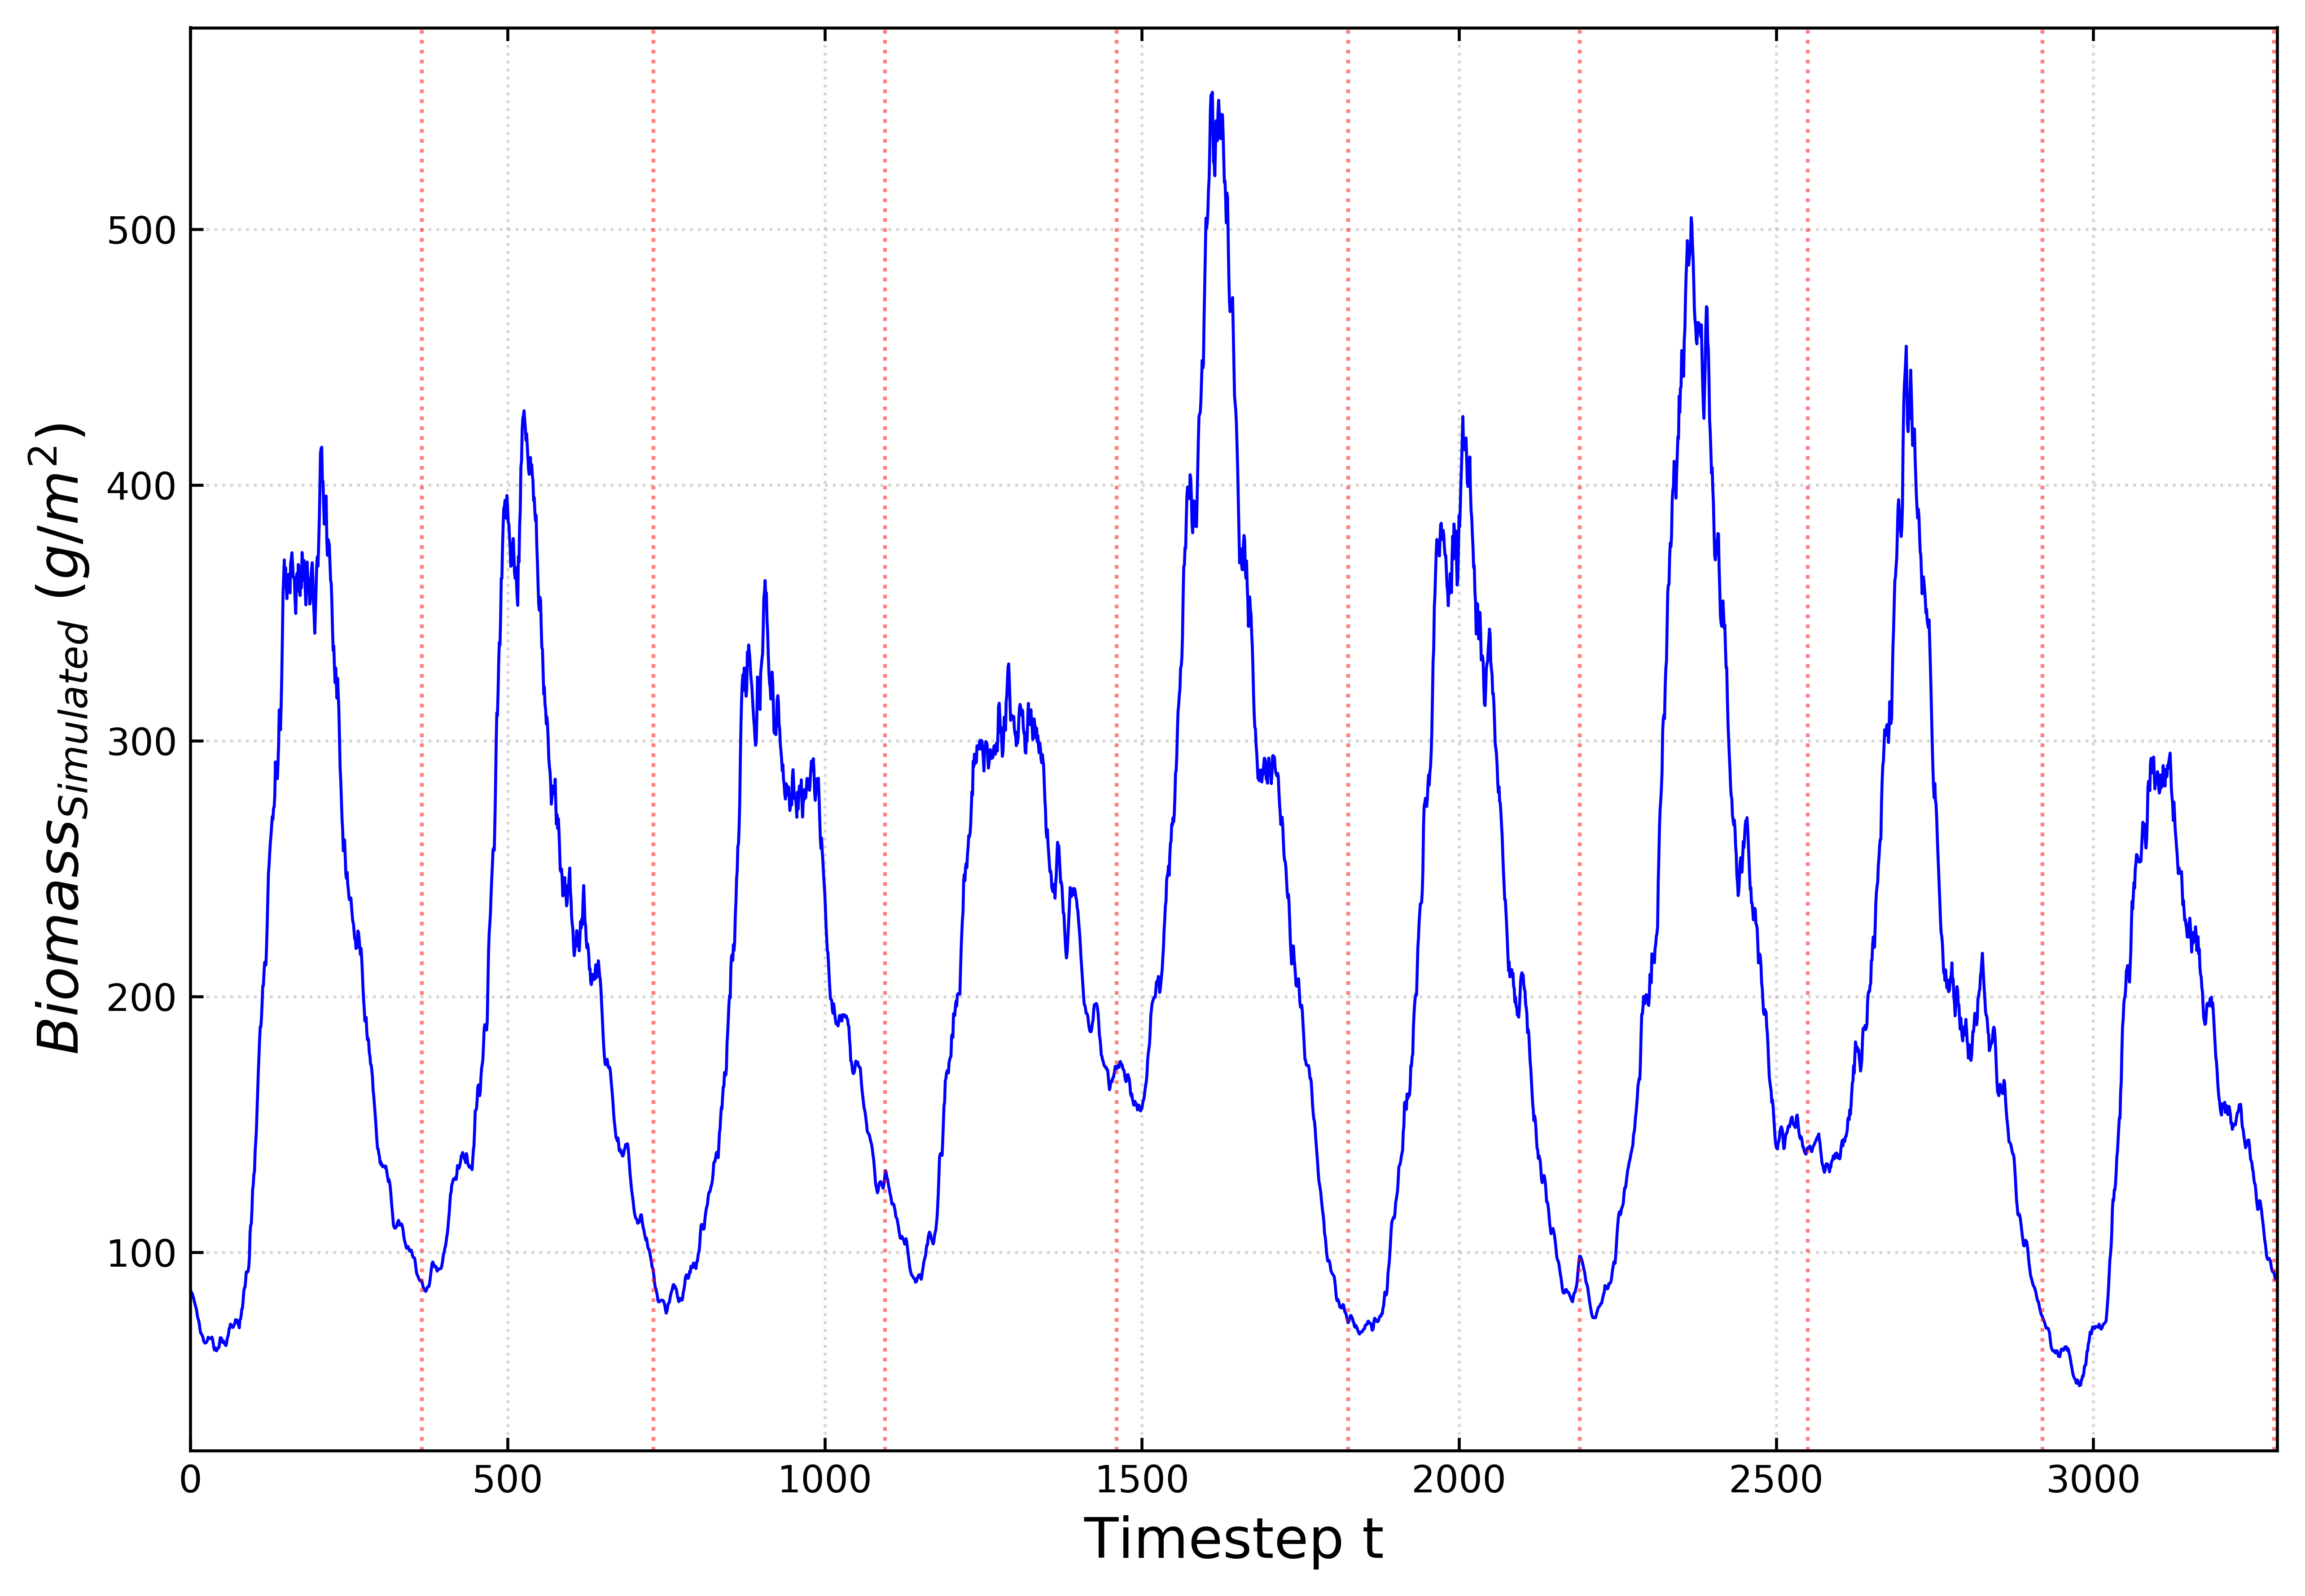

In [56]:
fig = figure(num=None, figsize=(10, 7), dpi=600, facecolor='w', edgecolor='k')
plt.plot(range(3288), Biomass_theta(Sunshine, Temperature, Big_t['Theta_0'], 85, len(Big_t)), linewidth = 0.8, 
         label = 'Original', ls = '-', color = 'blue')
#plt.plot(range(3288), Biomass_theta(Sunshine, Temperature, Big_t['Theta_10'], 85, len(Big_t)), linewidth = 0.25, label = '10%', ls = '-.')
#plt.plot(range(3288), Biomass_theta(Sunshine, Temperature, Big_t['Theta_20'], 85, len(Big_t)), linewidth = 0.25, label = '20%', ls = '-.')
#plt.plot(range(3288), Biomass_theta(Sunshine, Temperature, Big_t['Theta_30'], 85, len(Big_t)), linewidth = 0.25, label = '30%', ls = '-.')
#plt.plot(range(3288), Biomass_theta(Sunshine, Temperature, Big_t['Theta_40'], 85, len(Big_t)), linewidth = 0.25, label = '40%', ls = '-.')
#plt.legend(title = 'Abstraction')
plt.xlim(0, 3290)
plt.ylabel('$Biomass_{Simulated}$ ($g/m^2$)', fontsize = 15)
plt.xlabel('Timestep t', fontsize = 15)
plt.axvline(x = 365, linewidth=1, color='r', ls = ':', alpha = 0.5)
plt.axvline(x = 730, linewidth=1, color='r', ls = ':', alpha = 0.5)
plt.axvline(x = 1095, linewidth=1, color='r', ls = ':', alpha = 0.5)
plt.axvline(x = 1460, linewidth=1, color='r', ls = ':', alpha = 0.5)
plt.axvline(x = 1825, linewidth=1, color='r', ls = ':', alpha = 0.5)
plt.axvline(x = 2190, linewidth=1, color='r', ls = ':', alpha = 0.5)
plt.axvline(x = 2550, linewidth=1, color='r', ls = ':', alpha = 0.5)
plt.axvline(x = 2920, linewidth=1, color='r', ls = ':', alpha = 0.5)
plt.axvline(x = 3285, linewidth=1, color='r', ls = ':', alpha = 0.5)
plt.tick_params(direction = 'in', top = True)
plt.grid(True, which = 'major', linestyle = ':', alpha = 0.5)
#plt.savefig("C:\\Users\\pblac\\OneDrive\\Documentos\\MSc ESS\\SEMESTER 2\\IEM\\PROJECT3\\Time_Series.png", dpi = 600)
plt.show()

In [57]:
Big_t['Biomass_0'] = Biomass_theta(Sunshine, Temperature, Big_t['Theta_0'], 85, len(Big_t))[0:3287].tolist()
Big_t['Biomass_10'] = Biomass_theta(Sunshine, Temperature, Big_t['Theta_10'], 85, len(Big_t))[0:3287].tolist()
Big_t['Biomass_20'] = Biomass_theta(Sunshine, Temperature, Big_t['Theta_20'], 85, len(Big_t))[0:3287].tolist()
Big_t['Biomass_30'] = Biomass_theta(Sunshine, Temperature, Big_t['Theta_30'], 85, len(Big_t))[0:3287].tolist()
Big_t['Biomass_40'] = Biomass_theta(Sunshine, Temperature, Big_t['Theta_40'], 85, len(Big_t))[0:3287].tolist()

In [58]:
Big_t.head()

t  Temp         S      InF   Theta_0  Theta_10  Theta_20  Theta_30  \
0  1  2.50  0.701721   8856.2  1.000000  1.000000  1.000000  1.000000   
1  2  2.50  0.709406   8053.6  0.999802  0.999713  0.999624  0.999536   
2  3  3.00  0.717812   9040.8  0.999523  0.999354  0.999185  0.999016   
3  4  4.75  0.726942   9133.4  0.999344  0.999085  0.998826  0.998566   
4  5  4.65  1.527594  10149.0  0.999174  0.998824  0.998474  0.998124   

   Theta_40  Biomass_0  Biomass_10  Biomass_20  Biomass_30  Biomass_40  
0  1.000000  85.000000   85.000000   85.000000   85.000000   85.000000  
1  0.999447  84.603922   84.603922   84.603922   84.603922   84.603922  
2  0.998847  84.213293   84.213265   84.213237   84.213209   84.213182  
3  0.998307  83.687993   83.687912   83.687831   83.687750   83.687668  
4  0.997774  82.682091   82.681928   82.681765   82.681602   82.681439

In [59]:
Biomass_val_df = pd.read_excel('C:\\Users\\pblac\\OneDrive\\Documentos\\MSc ESS\\SEMESTER 2\\IEM\\PROJECT3\\Biomass_Data.xls', sheet_name='Biomass')
Biomass_val_df.head()

Day  Biomass (g/m2)
0  400      120.770318
1  420      119.728038
2  440      152.276373
3  460      163.149461
4  480      183.864224

In [60]:
join_Biomass = pd.merge(Biomass_val_df, Big_t, how = 'left', left_on = 'Day', right_on = 't')

In [61]:
join_Biomass.head()

Day  Biomass (g/m2)    t  Temp          S      InF  Theta_0  Theta_10  \
0  400      120.770318  400 -0.20   1.379096  12016.0      1.0  0.971788   
1  420      119.728038  420  7.00   8.254129  13741.0      1.0  0.974489   
2  440      152.276373  440  9.55   6.099738  16715.0      1.0  0.978964   
3  460      163.149461  460  5.95   6.579177  17875.0      1.0  0.986232   
4  480      183.864224  480  9.35  19.862332  16804.0      1.0  0.994644   

   Theta_20  Theta_30  Theta_40   Biomass_0  Biomass_10  Biomass_20  \
0  0.938357  0.904925  0.871493   99.252444   98.097683   95.354642   
1  0.939421  0.904353  0.869285  128.492743  126.042773  121.458170   
2  0.942100  0.905237  0.868373  133.569334  130.123889  124.128131   
3  0.947299  0.908367  0.869434  171.793520  166.357422  156.184372   
4  0.953551  0.912458  0.871366  257.151066  249.509704  231.407956   

   Biomass_30  Biomass_40  
0   89.704167   83.045644  
1  113.481392  104.385712  
2  115.067450  105.061136  
3  142.977422  128.964067  
4  210.081624  187.950166

In [62]:
join_Biomass.columns

Index([           u'Day', u'Biomass (g/m2)',              u't',
                 u'Temp',              u'S',            u'InF',
              u'Theta_0',       u'Theta_10',       u'Theta_20',
             u'Theta_30',       u'Theta_40',      u'Biomass_0',
           u'Biomass_10',     u'Biomass_20',     u'Biomass_30',
           u'Biomass_40'],
      dtype='object')

In [63]:
join_b = join_Biomass.drop(columns = ['t', 'Temp', 'S', 'InF', 'Theta_0', 'Theta_10', 'Theta_20', 'Theta_30', 'Theta_30', 'Theta_40'])

In [64]:
join_b

Day  Biomass (g/m2)   Biomass_0  Biomass_10  Biomass_20  Biomass_30  \
0    400      120.770318   99.252444   98.097683   95.354642   89.704167   
1    420      119.728038  128.492743  126.042773  121.458170  113.481392   
2    440      152.276373  133.569334  130.123889  124.128131  115.067450   
3    460      163.149461  171.793520  166.357422  156.184372  142.977422   
4    480      183.864224  257.151066  249.509704  231.407956  210.081624   
5    500      437.967658  395.845257  388.391266  359.902206  327.886250   
6    520      320.444751  383.967411  379.260582  352.972207  322.478492   
7    540      408.428243  403.825438  400.746025  375.745734  344.480202   
8    560      418.800084  314.051890  312.489672  294.342318  269.465101   
9    580      276.775471  265.638045  264.791745  249.625774  226.778115   
10   600      169.132125  241.289122  240.779917  226.400144  203.625243   
11   620      276.604659  237.750843  237.409356  221.762022  197.379202   
12   640      213.309849  212.370851  212.134125  196.677263  173.920369   
13   660      165.913119  172.259887  172.062532  158.296077  139.282056   
14   680      132.844847  138.776441  138.321849  126.466878  110.766936   
15   700      100.382756  117.392014  116.626518  106.158584   92.647217   
16   720      125.222452  105.505555  104.459368   94.763381   82.458825   
17   740       83.765422   80.561025   79.476482   71.871374   62.358558   
18   760       66.595853   84.954044   83.041910   74.483488   64.128825   
19   780       80.422936   86.936229   84.065714   74.652467   63.665382   
20   800       86.023833   96.330961   91.812790   80.316380   67.507178   
21   820       72.324938  123.647639  116.353413  100.088869   82.736640   
22   840      134.696507  160.848896  150.683602  127.971073  104.397276   
23   860      275.251681  231.788488  218.592017  184.754489  149.901034   
24   880      345.327362  329.850754  317.282196  272.186600  224.669246   
25   900      426.805938  326.577099  318.788165  276.984686  231.934490   
26   920      413.868675  314.208752  309.623559  272.846320  231.441623   
27   940      250.772938  283.177021  280.533694  249.024394  211.921192   
28   960      163.881253  278.234580  276.528564  246.157133  209.298473   
29   980      267.221863  292.010241  290.832437  258.965157  220.094144   
30  1000      236.942455  244.488012  243.738078  216.409365  183.803492   
31  1020      148.284705  189.618053  188.836900  166.435947  140.569433   
32  1040      208.889933  183.504512  182.139877  159.663232  134.227415   
33  1060      162.855004  162.920736  160.908007  140.390951  117.520019   
34  1080      106.093704  130.797486  128.719509  111.994349   93.497822   
35  1100      145.283535  128.681255  126.156142  109.455043   91.123238   
36  1120       67.517059  105.593403  103.028953   89.078375   73.900569   

    Biomass_40  
0    83.045644  
1   104.385712  
2   105.061136  
3   128.964067  
4   187.950166  
5   294.645018  
6   290.828469  
7   312.031555  
8   243.794749  
9   203.477567  
10  180.650850  
11  172.987120  
12  151.239957  
13  120.405703  
14   95.261804  
15   79.361341  
16   70.407552  
17   53.079866  
18   54.140057  
19   53.199698  
20   55.510467  
21   66.726466  
22   82.760601  
23  117.392622  
24  177.982862  
25  186.165150  
26  188.373297  
27  173.155686  
28  170.878867  
29  179.614891  
30  149.889453  
31  113.921914  
32  108.215288  
33   94.287341  
34   74.790448  
35   72.668349  
36   58.709326

In [65]:
join_b.corr()

Day  Biomass (g/m2)  Biomass_0  Biomass_10  Biomass_20  \
Day             1.000000       -0.132528  -0.123242   -0.124963   -0.188305   
Biomass (g/m2) -0.132528        1.000000   0.916479    0.914658    0.907560   
Biomass_0      -0.123242        0.916479   1.000000    0.999402    0.994695   
Biomass_10     -0.124963        0.914658   0.999402    1.000000    0.996742   
Biomass_20     -0.188305        0.907560   0.994695    0.996742    1.000000   
Biomass_30     -0.258297        0.894304   0.982699    0.985864    0.996067   
Biomass_40     -0.341577        0.869619   0.958293    0.962547    0.980926   

                Biomass_30  Biomass_40  
Day              -0.258297   -0.341577  
Biomass (g/m2)    0.894304    0.869619  
Biomass_0         0.982699    0.958293  
Biomass_10        0.985864    0.962547  
Biomass_20        0.996067    0.980926  
Biomass_30        1.000000    0.994262  
Biomass_40        0.994262    1.000000

In [66]:
Big_t.head()

t  Temp         S      InF   Theta_0  Theta_10  Theta_20  Theta_30  \
0  1  2.50  0.701721   8856.2  1.000000  1.000000  1.000000  1.000000   
1  2  2.50  0.709406   8053.6  0.999802  0.999713  0.999624  0.999536   
2  3  3.00  0.717812   9040.8  0.999523  0.999354  0.999185  0.999016   
3  4  4.75  0.726942   9133.4  0.999344  0.999085  0.998826  0.998566   
4  5  4.65  1.527594  10149.0  0.999174  0.998824  0.998474  0.998124   

   Theta_40  Biomass_0  Biomass_10  Biomass_20  Biomass_30  Biomass_40  
0  1.000000  85.000000   85.000000   85.000000   85.000000   85.000000  
1  0.999447  84.603922   84.603922   84.603922   84.603922   84.603922  
2  0.998847  84.213293   84.213265   84.213237   84.213209   84.213182  
3  0.998307  83.687993   83.687912   83.687831   83.687750   83.687668  
4  0.997774  82.682091   82.681928   82.681765   82.681602   82.681439

In [67]:
(pearsonr(join_b['Biomass (g/m2)'], join_b['Biomass_0'])[0]**2, pearsonr(Big_t['Biomass_0'], Big_t['Biomass_10'])[0]**2,
pearsonr(Big_t['Biomass_0'], Big_t['Biomass_20'])[0]**2, pearsonr(Big_t['Biomass_0'], Big_t['Biomass_30'])[0]**2,
pearsonr(Big_t['Biomass_0'], Big_t['Biomass_40'])[0]**2)

(0.8399343947785058,
 0.995951636074791,
 0.9581802341550449,
 0.8613657488659598,
 0.6854627577811802)

#### Comparison between simulation and actual data

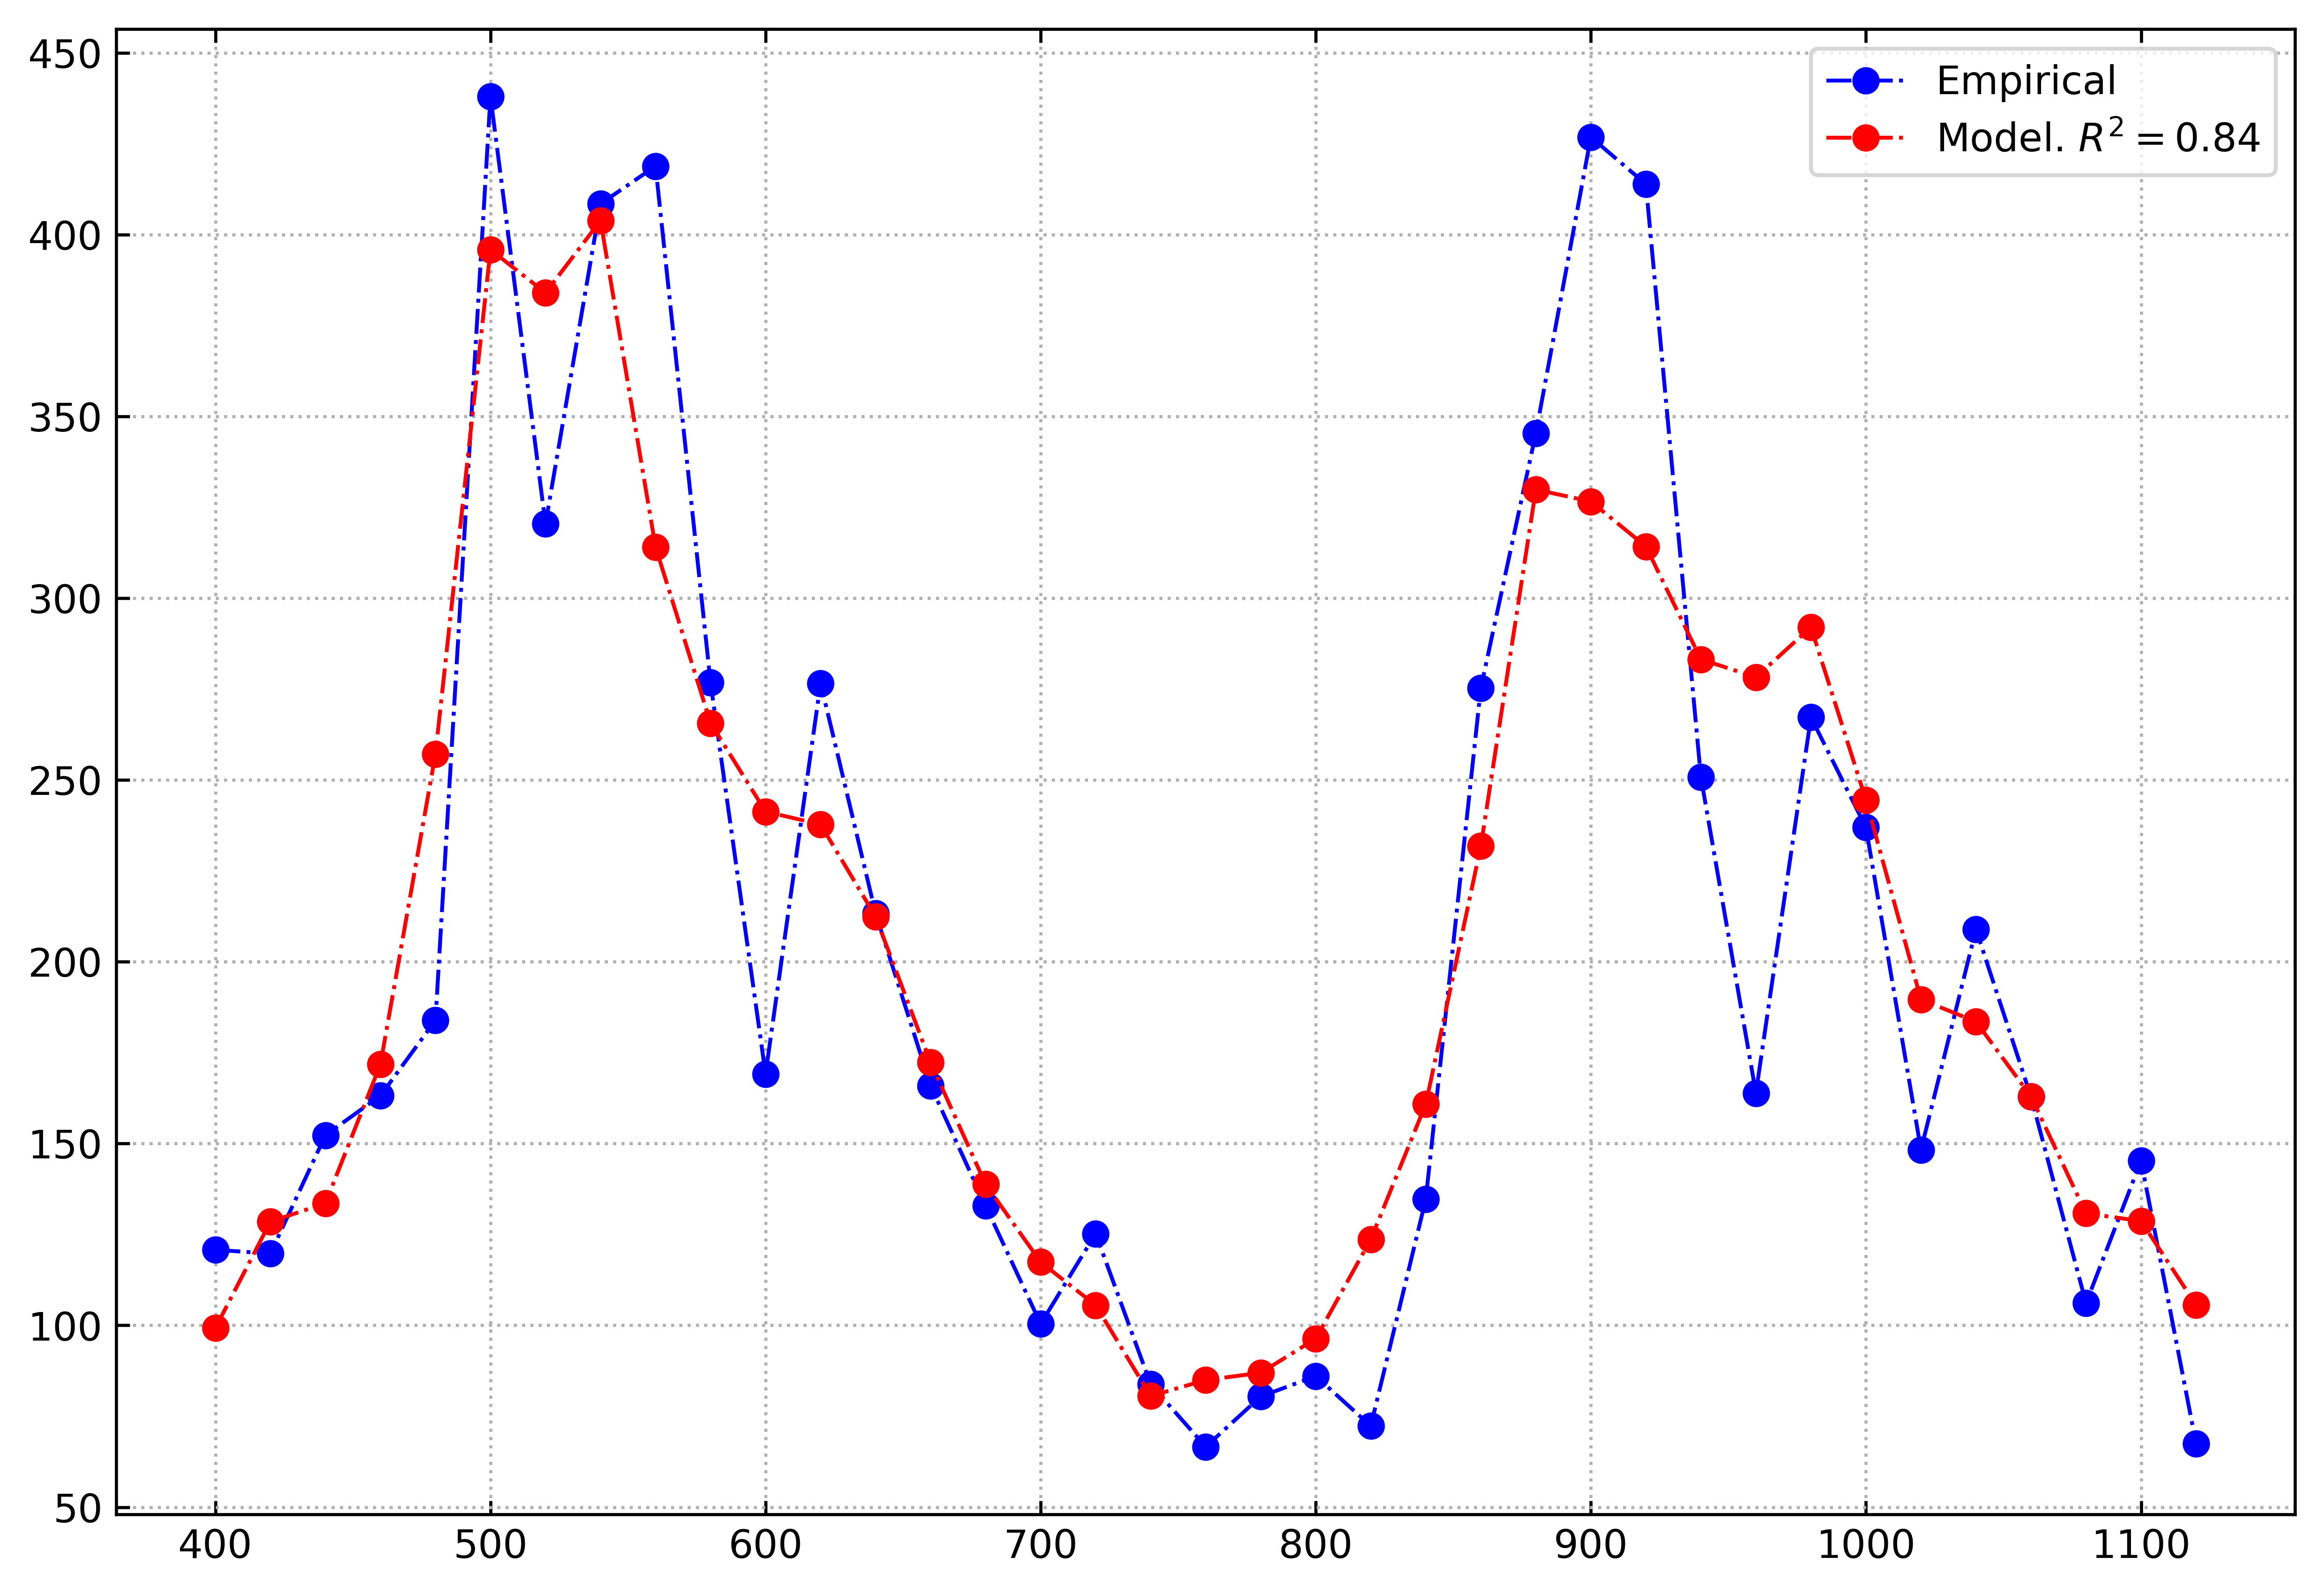

In [68]:
fig = figure(num=None, figsize=(10, 7), dpi=600, facecolor='w', edgecolor='k')
ax = plt.axes()
plt.plot(join_b['Day'], join_b['Biomass (g/m2)'], linewidth = 1, label = 'Empirical', ls = '-.', color = 'blue', marker = 'o')
plt.plot(join_b['Day'], join_b['Biomass_0'], linewidth = 1, ls = '-.', color = 'red', marker = 'o', 
        label = 'Model. $R^2 = %s$' %(round(pearsonr(join_b['Biomass (g/m2)'], join_b['Biomass_0'])[0]**2, 2)))
plt.legend()
ax.grid(which = 'both', ls = ':')
#plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
#plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
#plt.axvline(x = 880, linewidth=1, color='r', ls = ':')
#plt.axvline(x = 900, linewidth=1, color='r', ls = ':')
#plt.axvline(x = 910, linewidth=1, color='r', ls = ':')
#plt.axvline(x = 920, linewidth=1, color='r', ls = ':')
#fig.tick_params(which='both', width=2)
plt.tick_params(direction = 'in', top = True)
plt.show()

#### Residual Plot

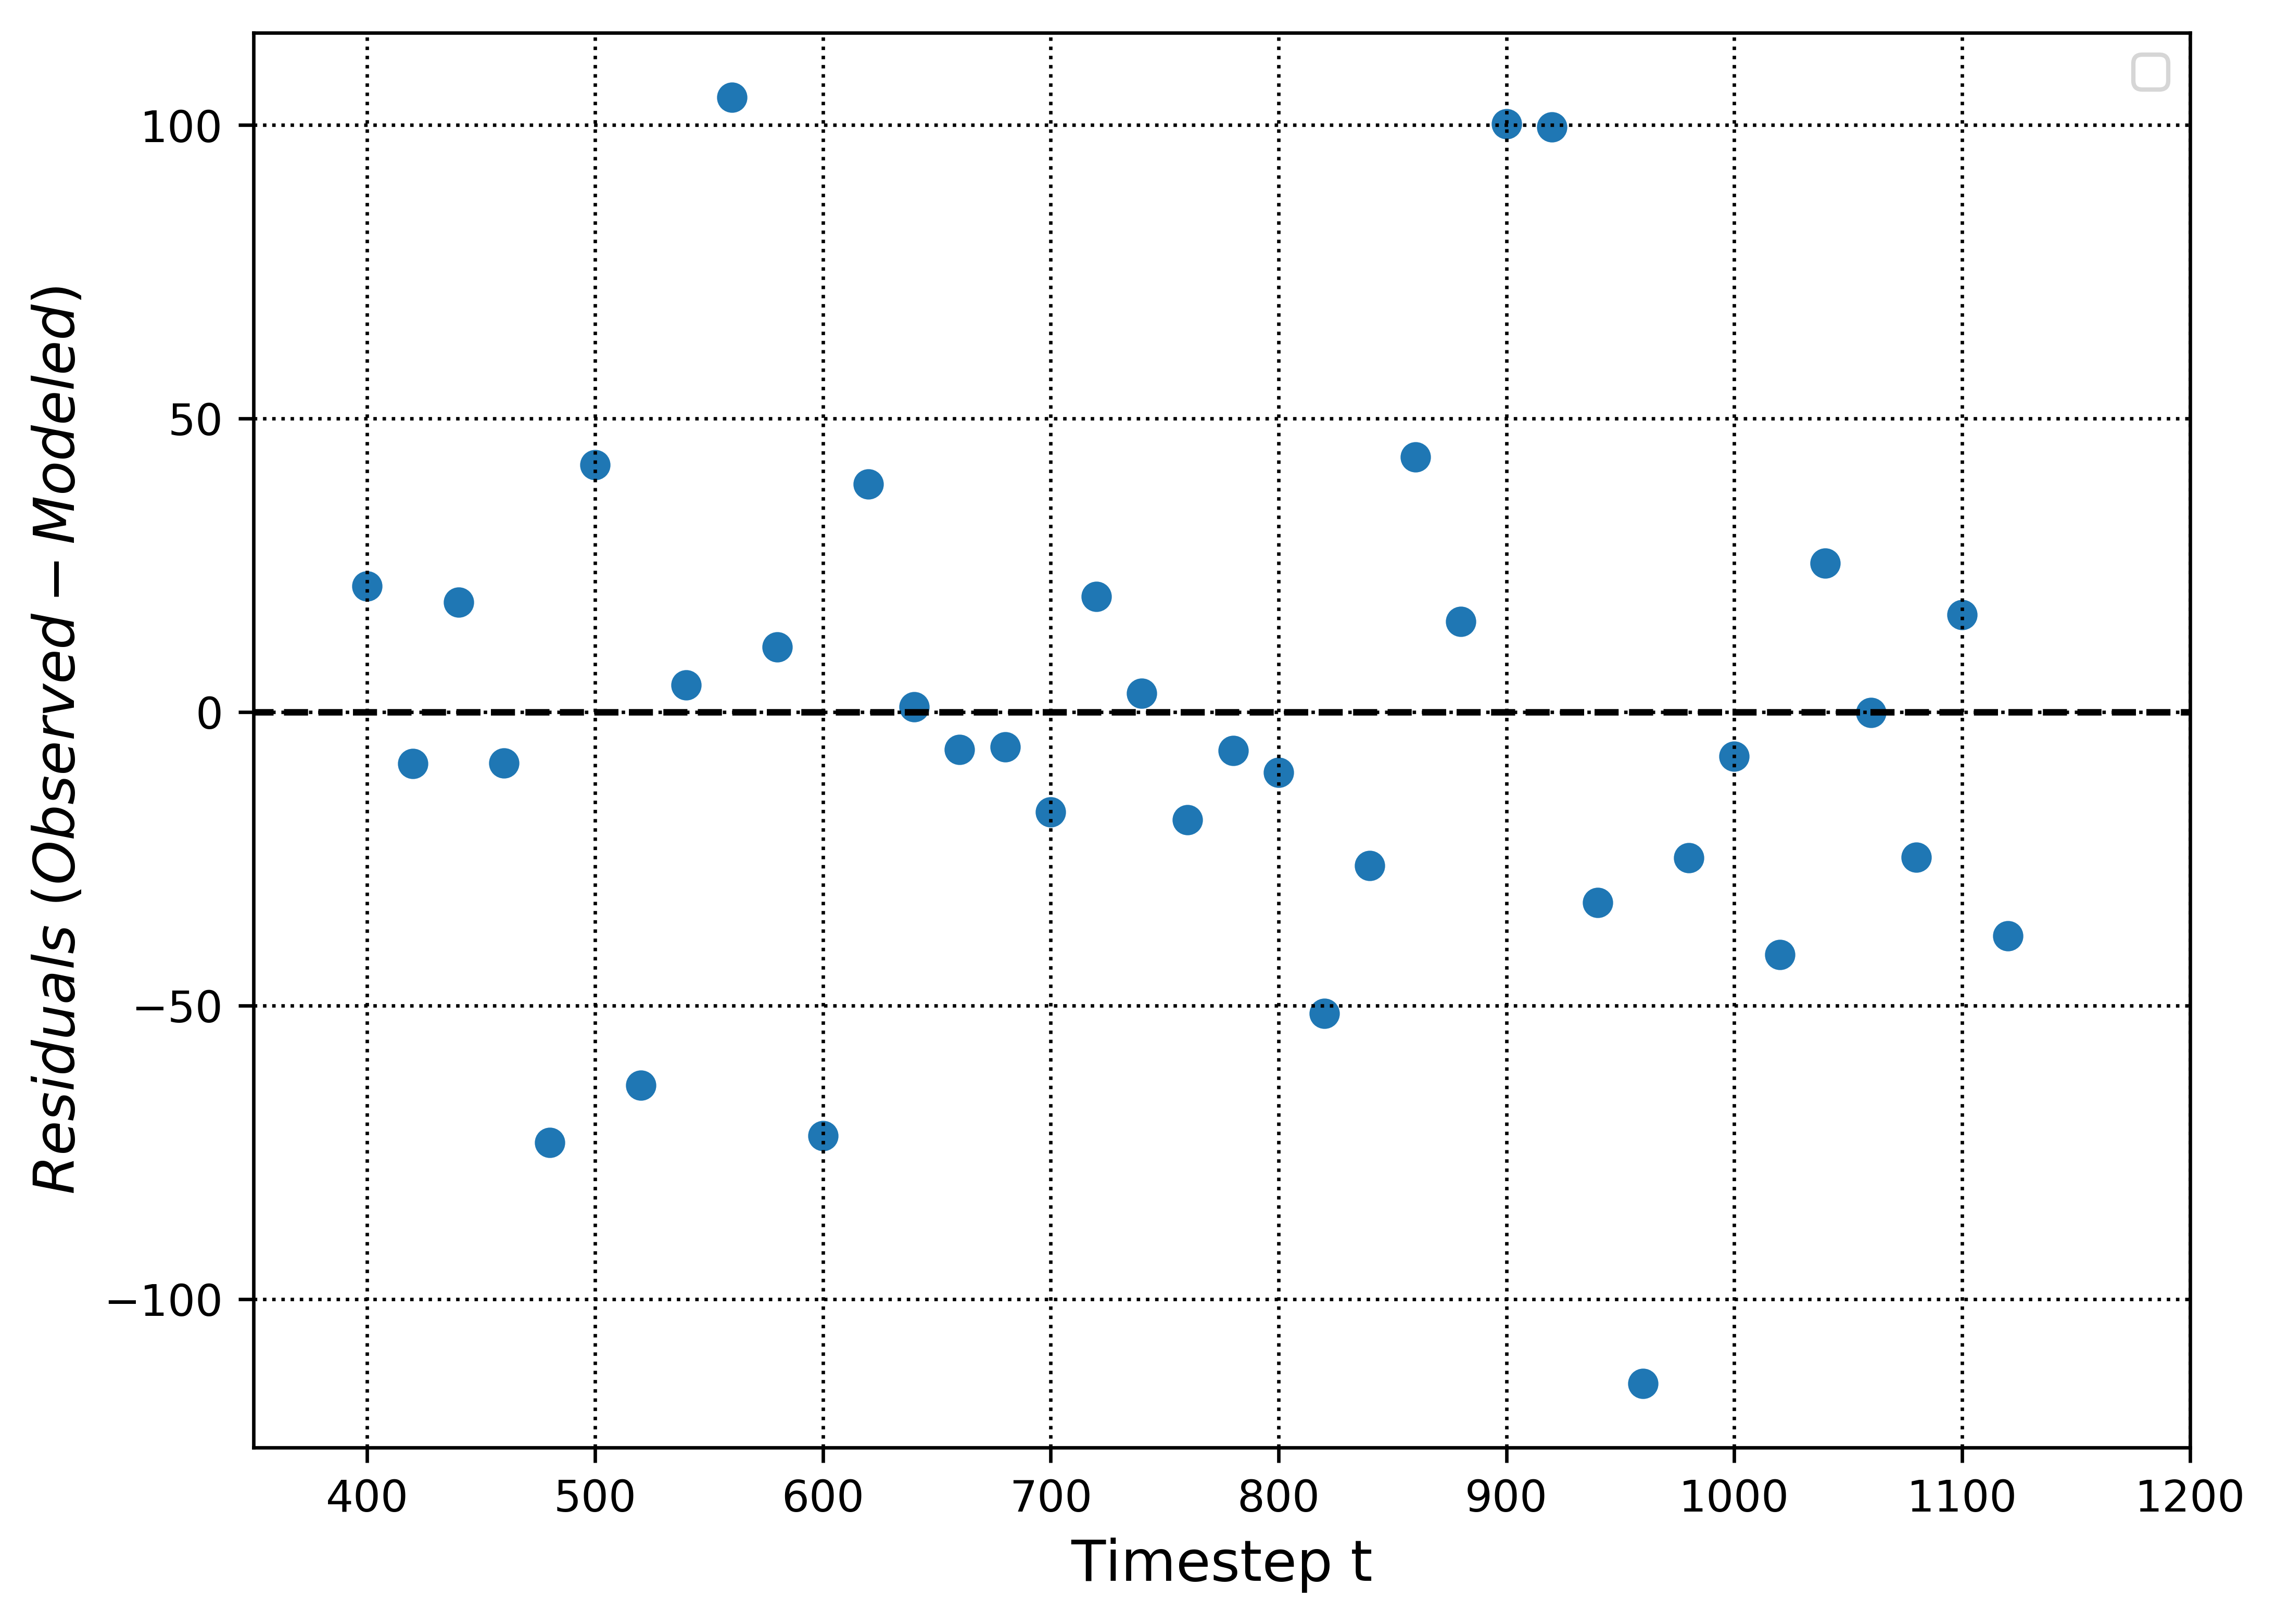

In [69]:
fig = figure(num=None, figsize=(8, 6), dpi=600, facecolor='w', edgecolor='k')
plt.scatter(join_b['Day'], join_b['Biomass (g/m2)']-join_b['Biomass_0'])
#plt.scatter(join_b['Day'], join_b['Biomass (g/m2)']-join_b['Biomass_10'], label = '$10\%$ Abstraction', color = 'lightgreen')
#plt.scatter(join_b['Day'], join_b['Biomass (g/m2)']-join_b['Biomass_20'], label = '$20\%$ Abstraction', color = 'orange')
#plt.scatter(join_b['Day'], join_b['Biomass (g/m2)']-join_b['Biomass_30'], label = '$30\%$ Abstraction', color = 'pink')
#plt.scatter(join_b['Day'], join_b['Biomass (g/m2)']-join_b['Biomass_40'], label = '$40\%$ Abstraction', color = 'cyan')
plt.grid(True, which = 'major', linestyle = ':', color = 'black')
plt.grid(True, which = 'minor', linestyle = ':', alpha = 0.2)
plt.hlines(0, 0, join_b['Day'].max()+100, linestyles = '--')
plt.xlim(350, 1200)
plt.xlabel('Timestep t', fontsize = 13)
plt.ylabel('$Residuals$ ($Observed-Modeled$)', fontsize = 13)
plt.legend()
#plt.title('Residuals for Prediction of Treatment $N_2O$ flux')
#plt.savefig("C:\\Users\\pblac\\OneDrive\\Documentos\\MSc ESS\\SEMESTER 2\\IEM\\PROJECT3\\res_0_abs.png", dpi = 600)
#plt.savefig("C:\\Users\\pblac\\OneDrive\\Documentos\\MSc ESS\\SEMESTER 2\\IEM\\PROJECT3\\Residuals.png", dpi = 600)
plt.show()

In [70]:
(pearsonr(join_b['Biomass (g/m2)'], join_b['Biomass_0'])[0]**2, pearsonr(join_b['Biomass (g/m2)'], join_b['Biomass_10'])[0]**2,
pearsonr(join_b['Biomass (g/m2)'], join_b['Biomass_20'])[0]**2, pearsonr(join_b['Biomass (g/m2)'], join_b['Biomass_30'])[0]**2,
pearsonr(join_b['Biomass (g/m2)'], join_b['Biomass_40'])[0]**2)

(0.8399343947785058,
 0.8365996838216055,
 0.8236660348133273,
 0.7997798523148894,
 0.7562364425974011)

In [71]:
(sqrt(mean_squared_error(join_b['Biomass (g/m2)'], join_b['Biomass_0'])),
 sqrt(mean_squared_error(join_b['Biomass (g/m2)'], join_b['Biomass_10'])),
 sqrt(mean_squared_error(join_b['Biomass (g/m2)'], join_b['Biomass_20'])),
 sqrt(mean_squared_error(join_b['Biomass (g/m2)'], join_b['Biomass_30'])),
 sqrt(mean_squared_error(join_b['Biomass (g/m2)'], join_b['Biomass_40'])))

(45.36342429440838,
 45.90316368559434,
 53.29235864206173,
 69.68603018262527,
 90.68620299230913)

#### Mean square error vs Pearson correlation coefficient by level of abstraction

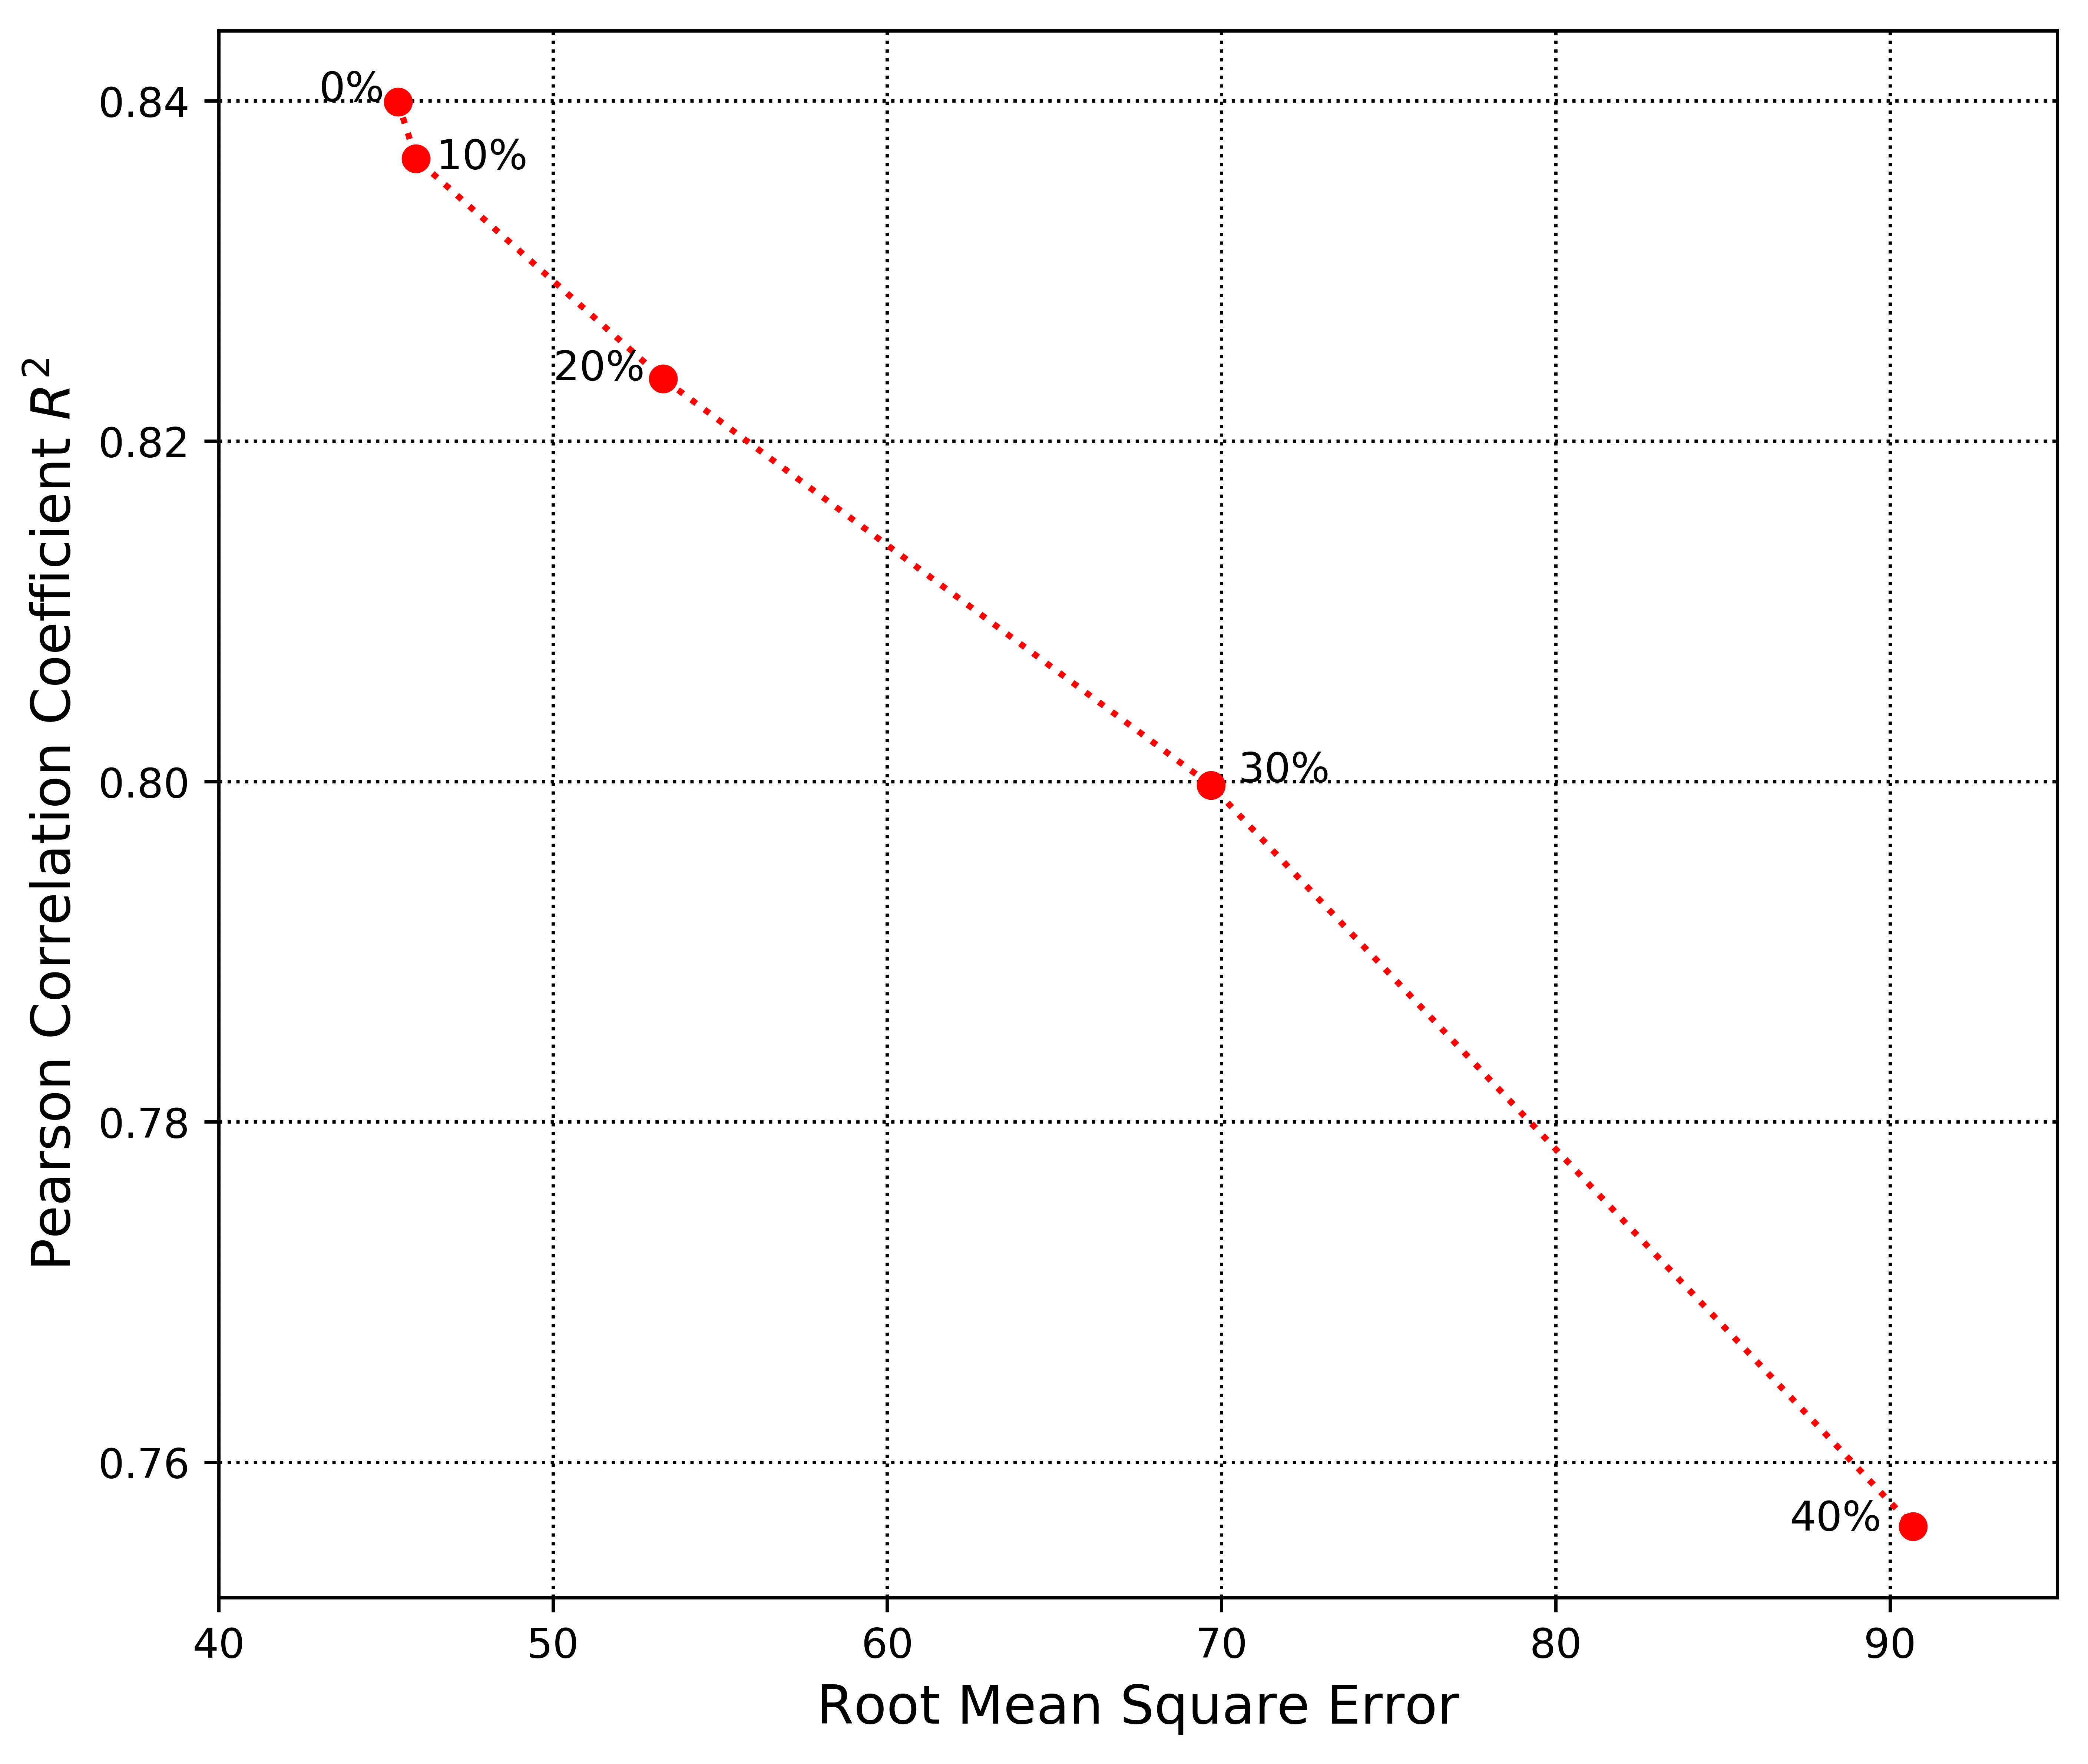

In [72]:
fig = figure(num=None, figsize=(8, 7), dpi=800, facecolor='w', edgecolor='k')
plt.plot( [sqrt(mean_squared_error(join_b['Biomass (g/m2)'], join_b['Biomass_0'])),
          sqrt(mean_squared_error(join_b['Biomass (g/m2)'], join_b['Biomass_10'])),
          sqrt(mean_squared_error(join_b['Biomass (g/m2)'], join_b['Biomass_20'])),
          sqrt(mean_squared_error(join_b['Biomass (g/m2)'], join_b['Biomass_30'])),
          sqrt(mean_squared_error(join_b['Biomass (g/m2)'], join_b['Biomass_40']))], [pearsonr(join_b['Biomass (g/m2)'], join_b['Biomass_0'])[0]**2, pearsonr(join_b['Biomass (g/m2)'], join_b['Biomass_10'])[0]**2,
pearsonr(join_b['Biomass (g/m2)'], join_b['Biomass_20'])[0]**2, pearsonr(join_b['Biomass (g/m2)'], join_b['Biomass_30'])[0]**2,
pearsonr(join_b['Biomass (g/m2)'], join_b['Biomass_40'])[0]**2], ls = ':', marker = 'o', color = 'red')
plt.xlim(40, 95)
plt.grid(color = 'black', linestyle = ':')
plt.text(43, 0.84, '$0\%$', fontsize = 10)
plt.text(46.5, 0.836, '$10\%$', fontsize = 10)
plt.text(50, 0.8236, '$20\%$', fontsize = 10)
plt.text(70.5, 0.8, '$30\%$', fontsize = 10)
plt.text(87, 0.756, '$40\%$', fontsize = 10)
plt.xlabel('Root Mean Square Error', fontsize = 13)
plt.ylabel('Pearson Correlation Coefficient $R^2$', fontsize = 13)
#plt.annotate('hola', (50, 0.8))
plt.savefig("C:\\Users\\pblac\\OneDrive\\Documentos\\MSc ESS\\SEMESTER 2\\IEM\\PROJECT3\\Corr_vs_RMSE.png", dpi = 600)
plt.show()

#### Comparison between real and simulated data (with uncertainty)

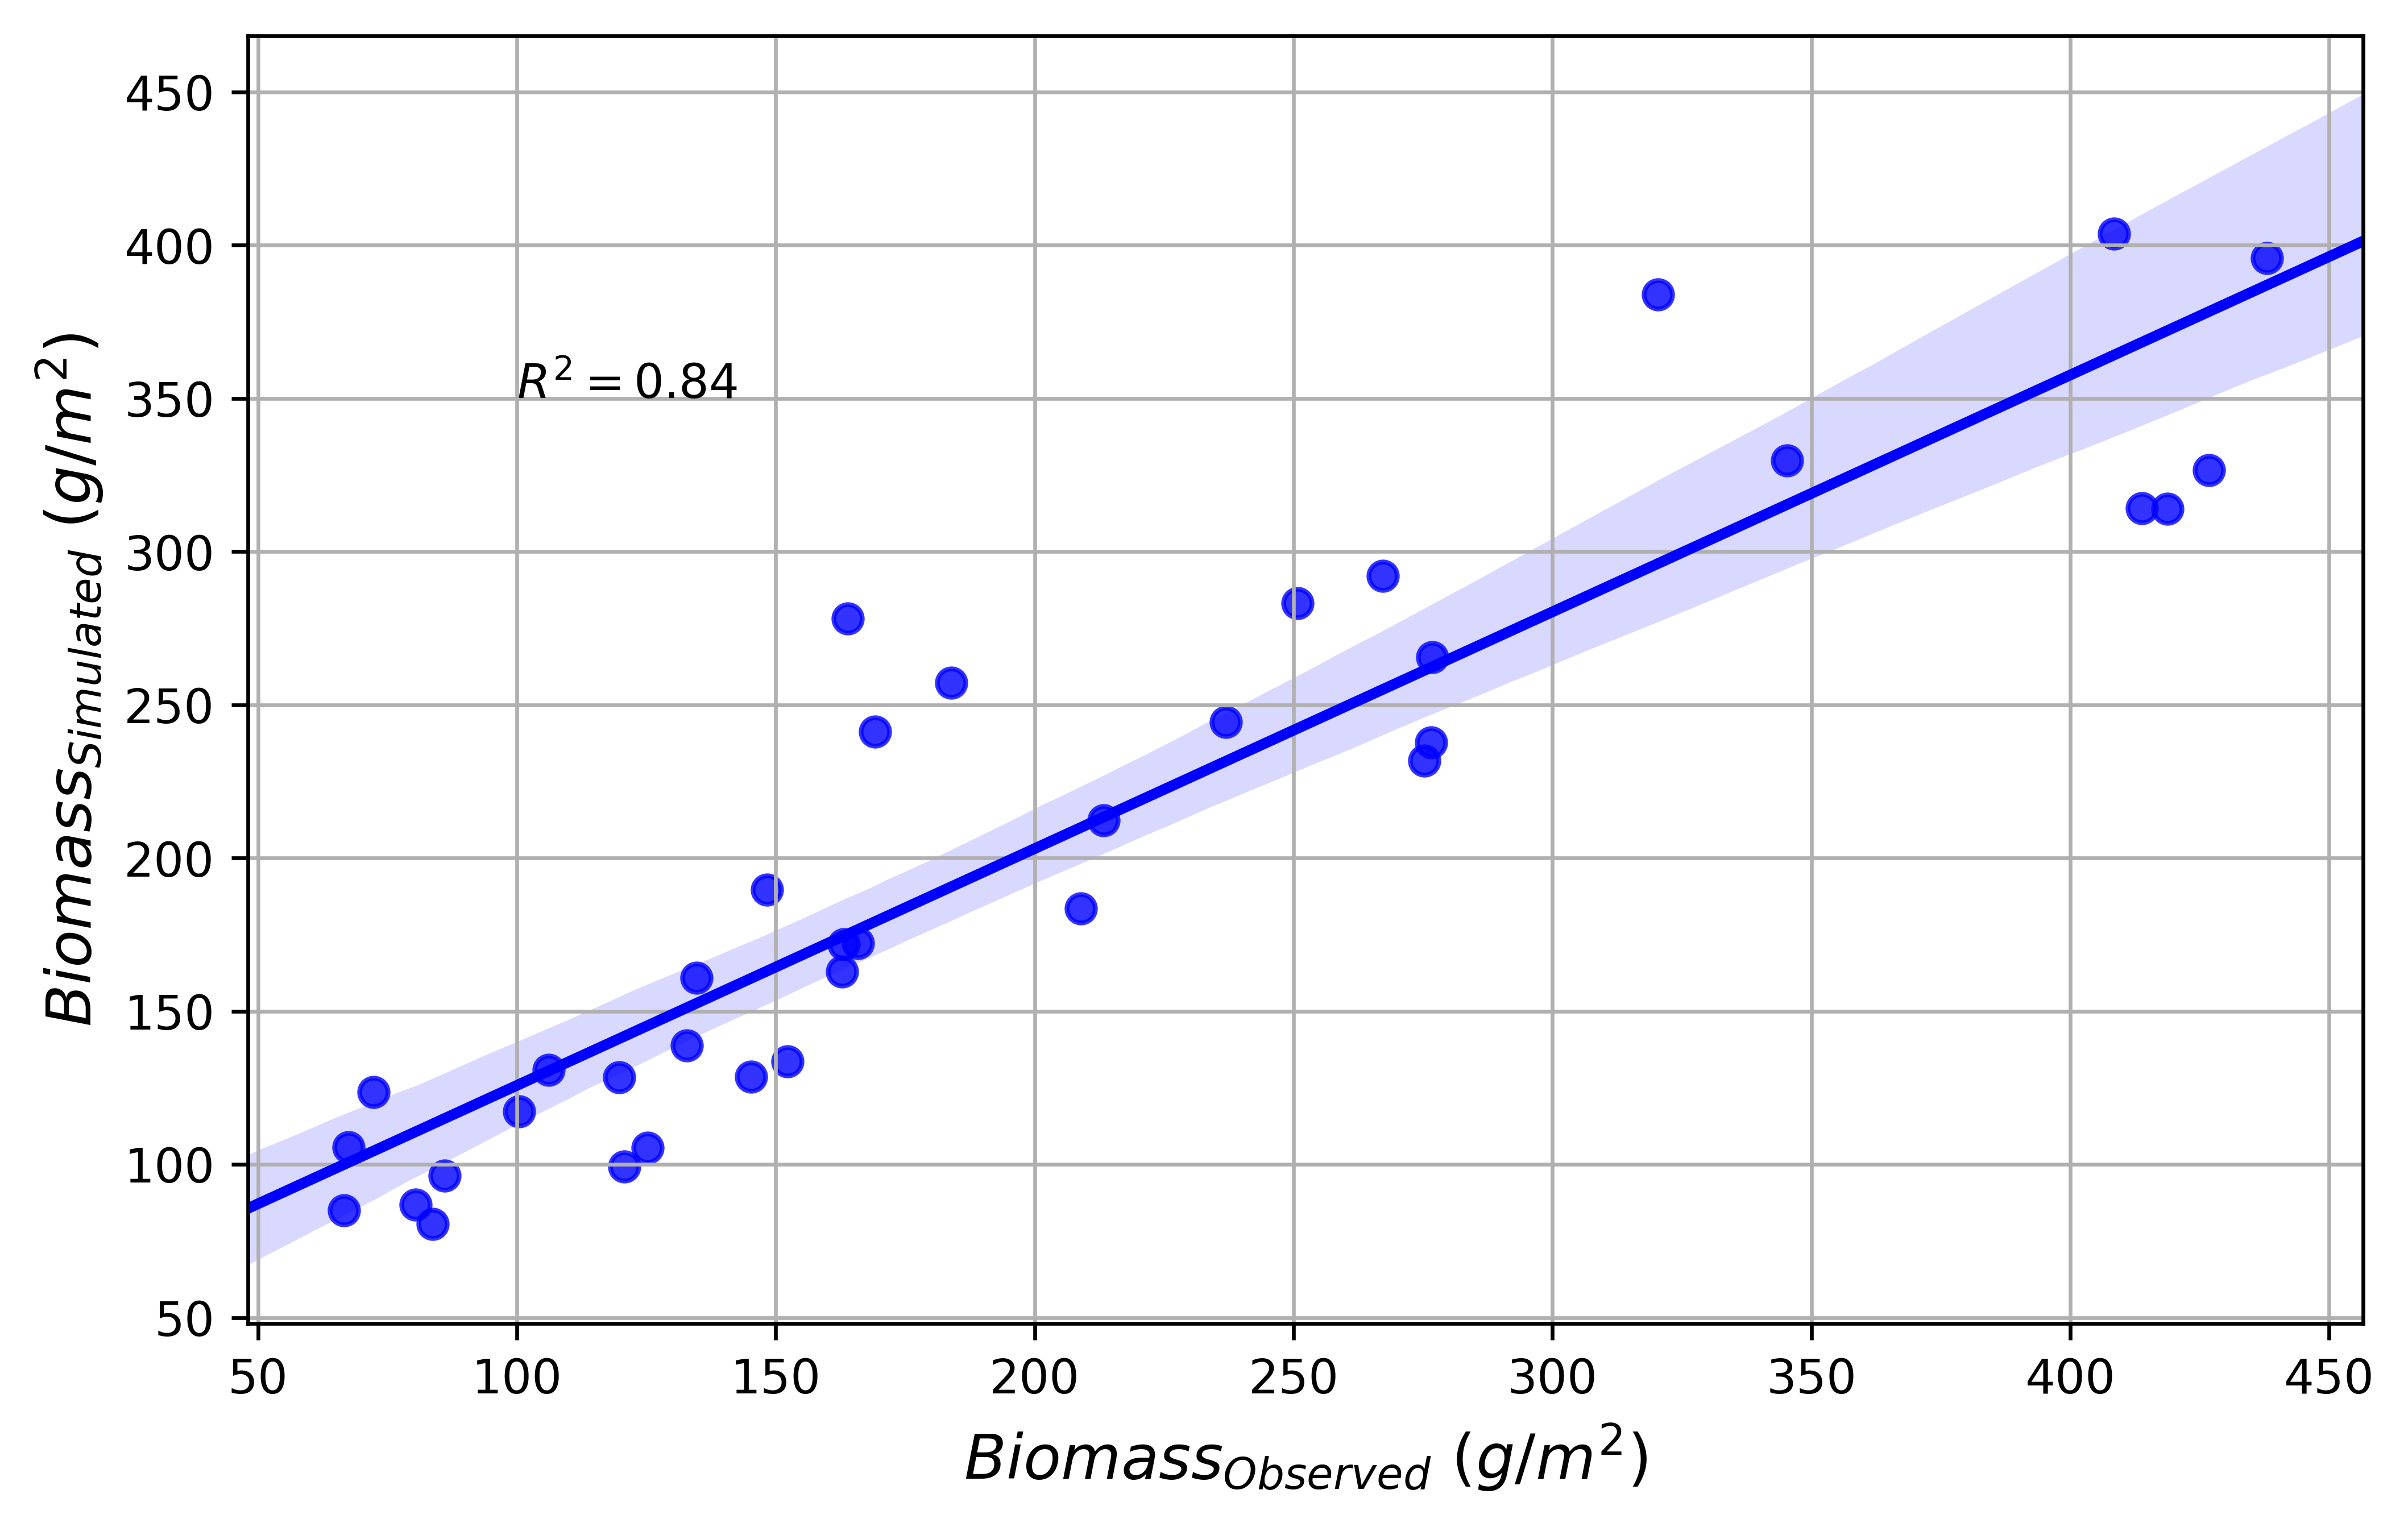

In [73]:
fig = figure(num=None, figsize=(8, 5), dpi=600, facecolor='w', edgecolor='k')
sns.regplot(x = join_b['Biomass (g/m2)'], y = join_b['Biomass_0'], color = 'blue')
plt.text(100, 350, '$R^2=$'+str(round(stats.pearsonr(join_b['Biomass (g/m2)'], join_b['Biomass_0'])[0]**2,3)))
plt.xlabel('$Biomass_{Observed}$ ($g/m^2$)', fontsize = 13)
plt.ylabel('$Biomass_{Simulated}$ ($g/m^2$)', fontsize = 13)
plt.grid()
#plt.savefig("C:\\Users\\pblac\\OneDrive\\Documentos\\MSc ESS\\SEMESTER 2\\IEM\\PROJECT3\\Corr_no_Abs.png", dpi = 600)
plt.show()

#### Biomass simulation graphs by abstraction level

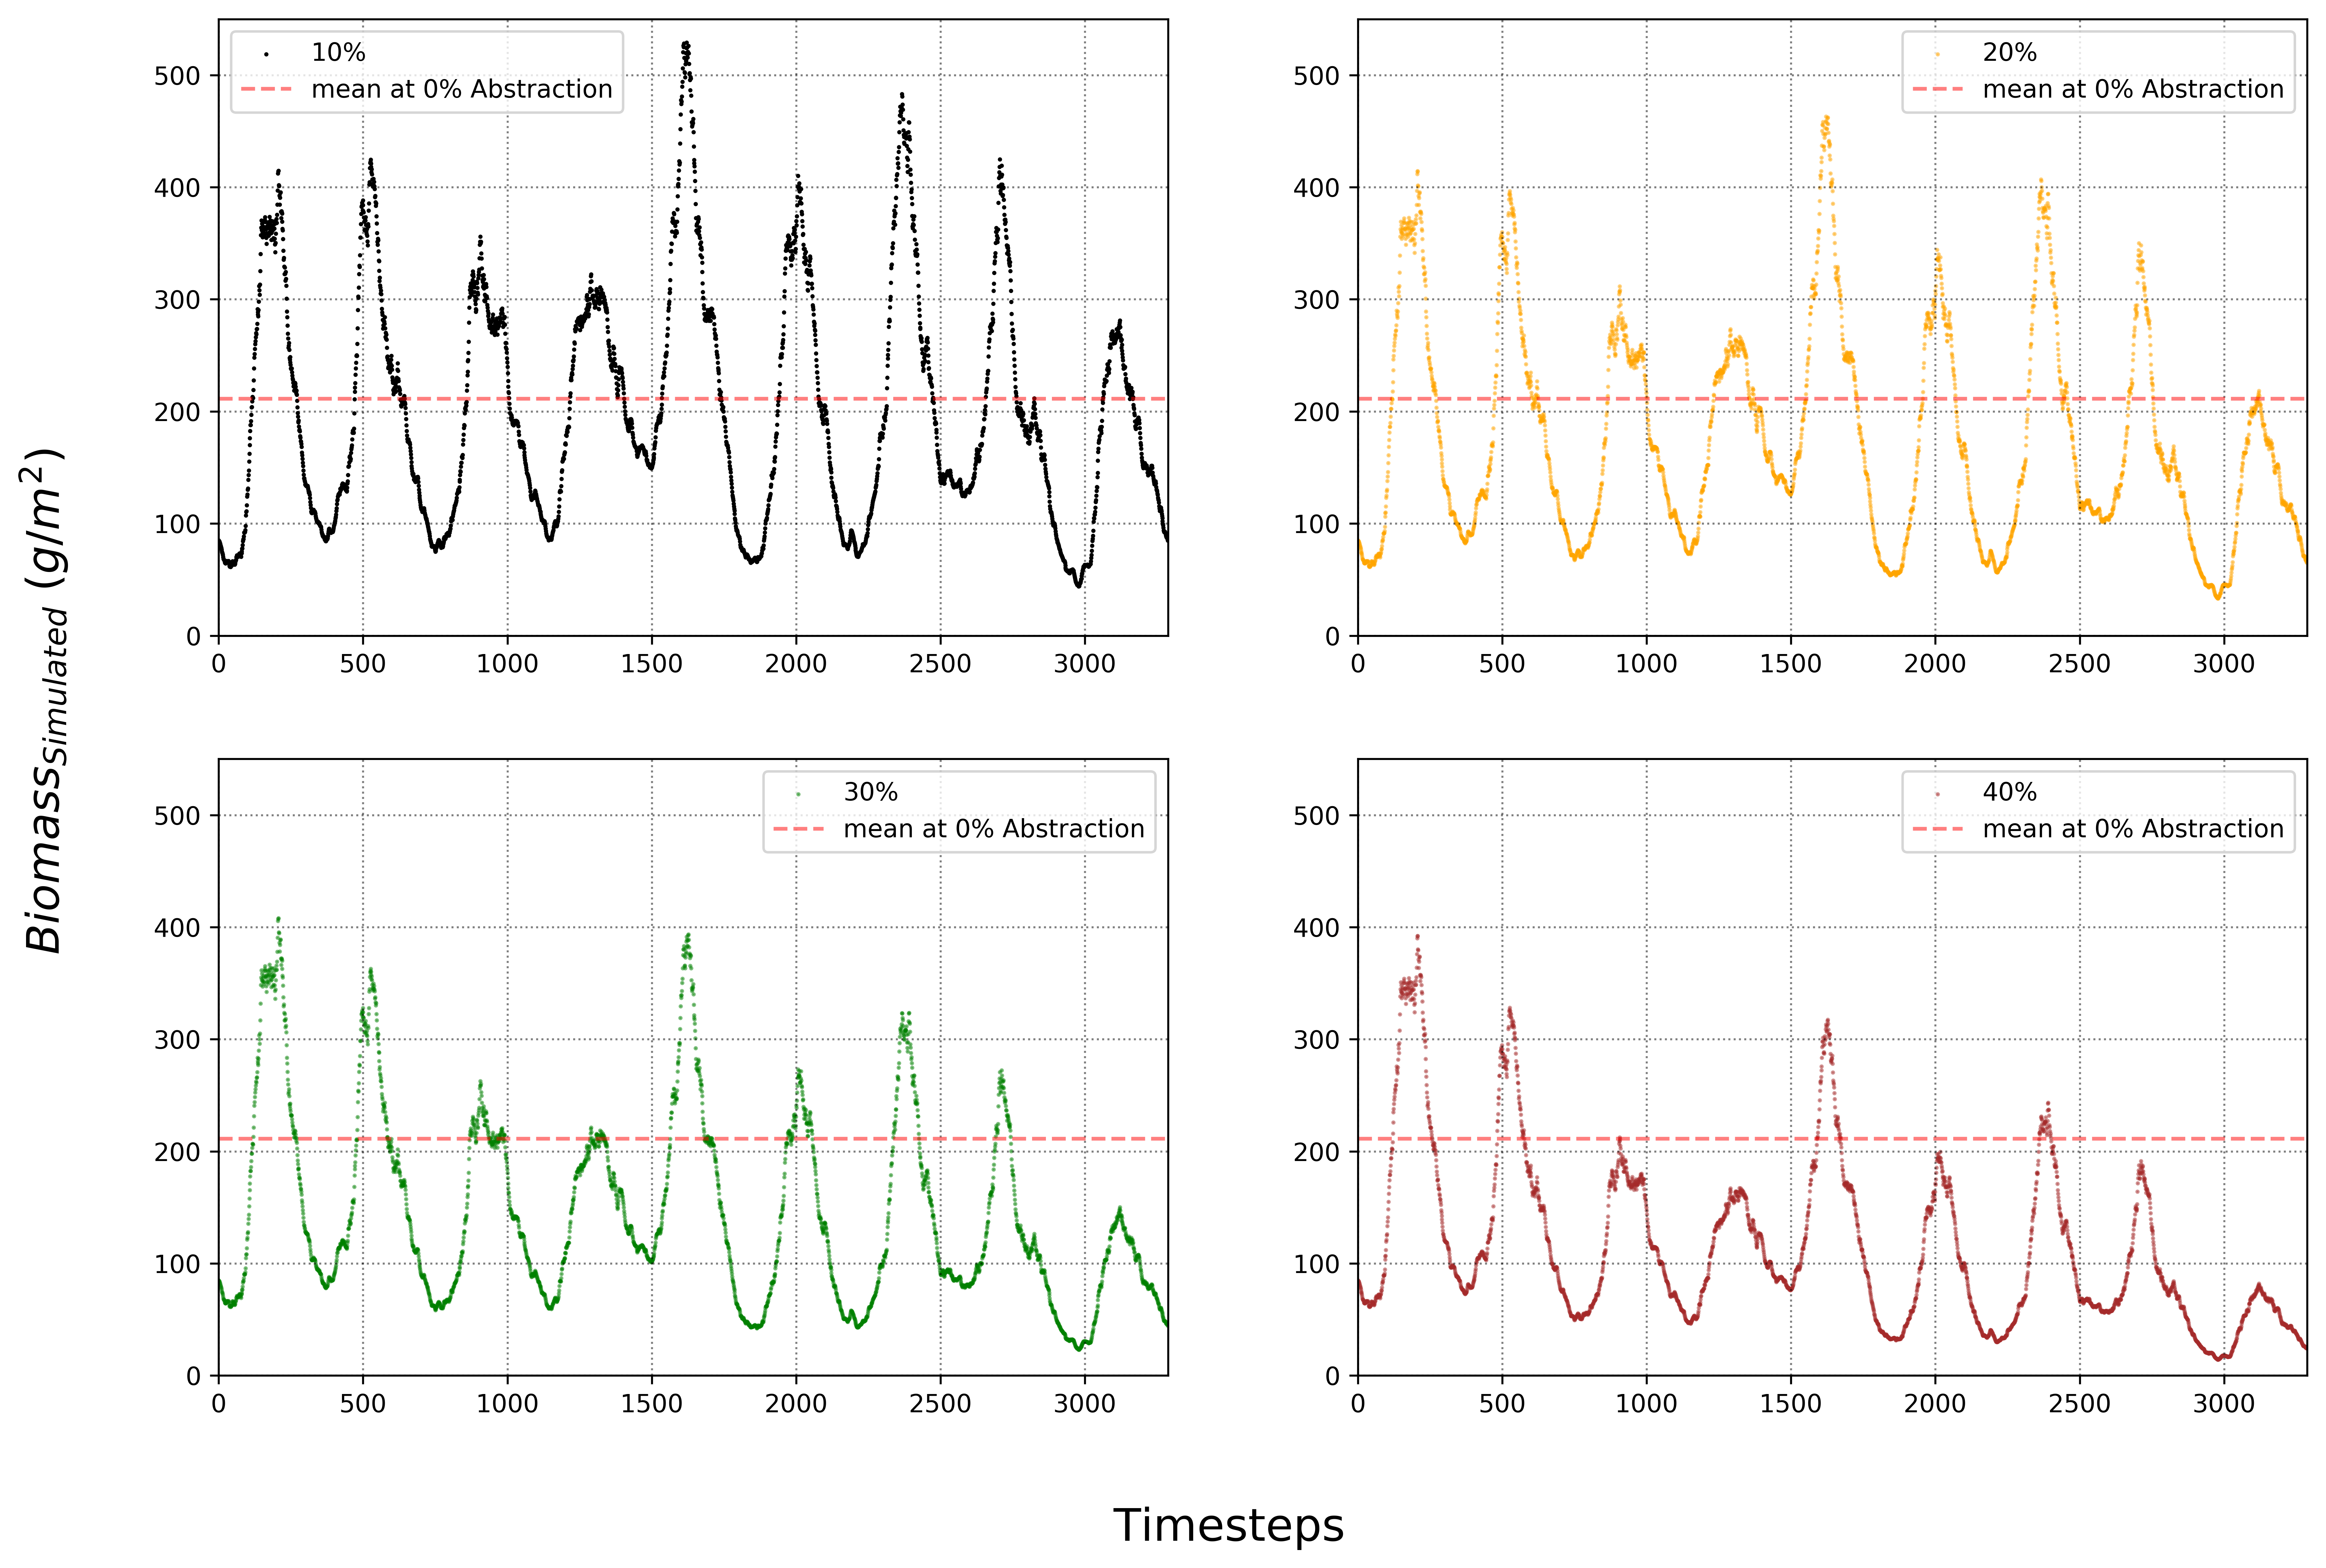

In [75]:
fig = figure(num=None, figsize=(15, 10), dpi=600, facecolor='w', edgecolor='k')
#fig.suptitle('Uncertainty Analysis for Great Lakes at 68% Confidence Interval', fontsize=14, fontweight='bold')

ax1 = plt.subplot(2, 2, 1)
#plt.plot(eries_68['IV'], eries_68['Mean'], '-o', linestyle = 'dashed', linewidth = 0.5, label = 'Control', color = 'blue',
#        markersize = 1, facecolors = 'none')
plt.scatter(range(3288), Biomass_theta(Sunshine, Temperature, Big_t['Theta_10'], 85, len(Big_t)),facecolors = 'black', edgecolors='black', marker = ".",
            label = '10%', s = 2.0)
plt.xlim(xmin = 0, xmax = 3288)
plt.ylim(ymin = 0, ymax = 550)
plt.grid(True, which = 'major', linestyle = ':', color = 'black', alpha = 0.5)
plt.grid(True, which = 'minor', linestyle = ':', alpha = 0.2)
plt.hlines(Big_t['Biomass_0'].mean(), 0, 3288, linestyles = '--', color = 'red', label = 'mean at 0% Abstraction', alpha = 0.5)
#plt.title('Erie (Uncertainty in all parameters)', fontsize = 8)
#plt.xlabel('Timesteps', fontsize = 8)
#plt.ylabel('Equilibrium Concentration', fontsize = 8)
plt.legend()

ax2 = plt.subplot(2, 2, 2)
#plt.plot(eries_68['IV'], eries_68['Mean'], '-o', linestyle = 'dashed', linewidth = 0.5, label = 'Control', color = 'blue',
#        markersize = 1, facecolors = 'none')
plt.scatter(range(3288), Biomass_theta(Sunshine, Temperature, Big_t['Theta_20'], 85, len(Big_t)), facecolors='orange', edgecolors='orange', alpha = 0.5, marker = ".", 
           label = '20%', s = 2.0)
plt.xlim(xmin = 0, xmax = 3288)
plt.ylim(ymin = 0, ymax = 550)
plt.grid(True, which = 'major', linestyle = ':', color = 'black', alpha = 0.5)
plt.grid(True, which = 'minor', linestyle = ':', alpha = 0.2)
plt.hlines(Big_t['Biomass_0'].mean(), 0, 3288, linestyles = '--', color = 'red', label = 'mean at 0% Abstraction', alpha = 0.5)
#plt.title('Erie (Uncertainty in all parameters)', fontsize = 8)
#plt.xlabel('Timesteps', fontsize = 8)
#plt.ylabel('Equilibrium Concentration', fontsize = 8)
plt.legend()

ax3 = plt.subplot(2, 2, 3)
#plt.plot(eries_68['IV'], eries_68['Mean'], '-o', linestyle = 'dashed', linewidth = 0.5, label = 'Control', color = 'blue',
#        markersize = 1, facecolors = 'none')
plt.scatter(range(3288), Biomass_theta(Sunshine, Temperature, Big_t['Theta_30'], 85, len(Big_t)), s = 2.0, facecolors='green', edgecolors='green', alpha = 0.5, marker = ".", 
           label = '30%')
plt.xlim(xmin = 0, xmax = 3288)
plt.ylim(ymin = 0, ymax = 550)
plt.grid(True, which = 'major', linestyle = ':', color = 'black', alpha = 0.5)
plt.grid(True, which = 'minor', linestyle = ':', alpha = 0.2)
plt.hlines(Big_t['Biomass_0'].mean(), 0, 3288, linestyles = '--', color = 'red', label = 'mean at 0% Abstraction', alpha = 0.5)
#plt.title('Erie (Uncertainty in all parameters)', fontsize = 8)
#plt.xlabel('Timesteps', fontsize = 8)
#plt.ylabel('Equilibrium Concentration', fontsize = 8)
plt.legend()


ax4 = plt.subplot(2, 2, 4)
#plt.plot(eries_68['IV'], eries_68['Mean'], '-o', linestyle = 'dashed', linewidth = 0.5, label = 'Control', color = 'blue',
#        markersize = 1, facecolors = 'none')
plt.scatter(range(3288), Biomass_theta(Sunshine, Temperature, Big_t['Theta_40'], 85, len(Big_t)), s = 2.0, facecolors='brown', edgecolors='brown', alpha = 0.5, 
            marker = ".", label = '40%')
plt.xlim(xmin = 0, xmax = 3288)
plt.ylim(ymin = 0, ymax = 550)
plt.grid(True, which = 'major', linestyle = ':', color = 'black', alpha = 0.5)
plt.grid(True, which = 'minor', linestyle = ':', alpha = 0.2)
plt.hlines(Big_t['Biomass_0'].mean(), 0, 3288, linestyles = '--', color = 'red', label = 'mean at 0% Abstraction', alpha = 0.5)
#plt.title('Erie (Uncertainty in all parameters)', fontsize = 8)
#plt.xlabel('Timesteps', fontsize = 8)
#plt.ylabel('Equilibrium Concentration', fontsize = 8)
plt.legend()
fig.text(0.5, 0.04, 'Timesteps', ha='center', va='center', fontsize = 18)
fig.text(0.06, 0.5, '$Biomass_{Simulated}$ ($g/m^2$)', ha='center', va='center', rotation='vertical', fontsize = 18)
#plt.savefig("C:\\Users\\pblac\\OneDrive\\Documentos\\MSc ESS\\SEMESTER 2\\IEM\\PROJECT3\\SImuls.png", dpi = 600)
plt.show()

#plt.title('Residuals for Prediction of Control $N_2O$ flux')

#plt.xlabel(data2.columns[0])

In [76]:
(Big_t['Biomass_0'].mean(), Big_t['Biomass_10'].mean(), Big_t['Biomass_20'].mean(), Big_t['Biomass_30'].mean(), Big_t['Biomass_40'].mean())

(211.40547444254557,
 204.18561005833607,
 175.92990981258546,
 145.8146979966469,
 115.10863581279479)